# Zadanie 1: optymalizacja gradientowa

Termin realizacji: 17 marca 2025

Wybierz jedną z testowych funkcji o dwóch zmiennych do optymalizacji (z [https://en.wikipedia.org/wiki/Test_functions_for_optimization](Test_functions_for_optimization)) (oprócz "sphere function", "Matyas function" i "Booth function").

Zadanie do oddania przez MS Teams. Do oddania: kod oraz krótkie sprawozdanie w PDF (można na przykład przy użyciu `quarto render notebook.ipynb --to pdf`).

## Na 3.0

Do realizacji:

1. Weź implementację optymalizacji gradientowej z zadania z ostatnich ćwiczeń.
2. Wylosuj 10 punktów z dziedziny przeszukiwania z tabelki. Dla każdego z nich przeprowadź 100 kroków optymalizacji metodą największego spadku ze stałym krokiem. Narysuj wykres zależności wartości funkcji optymalizowanej od kroku optymalizacji.
3. Przeprowadź procedurę dla kilku kroków. Spróbuj zilustrować brak zbieżności, szybką zbieżność i powolną zbieżność.

## Na 4.0

Do realizacji:

1. Punkty z zadania na 3.0.
2. Zamień stały krok z poprzedniego zadania na warunek wystarczającego spadku Armijo. Jako początkowy bracket przyjmij $[0, 1]$. Porównaj zbieżność metody o stałym kroku z przeszukiwaniem liniowym za pomocą wykresów wartości w konkretnym kroku uśrednione między poszczególnymi punktami początkowymi. Porównaj wyniki dla 6 różnych kombinacji parametrów metody Armijo.

## Na 5.0

Do realizacji:

1. Punkty z zadania na 4.0.
2. Zamień stały bracket $[0, 1]$ z poprzedniego punktu na metodę automatycznie określającą bracket (przykład z wykładu). Porównaj wyniki z poprzednią metodą dla minimum 6 zestawów parametrów bracketingu.


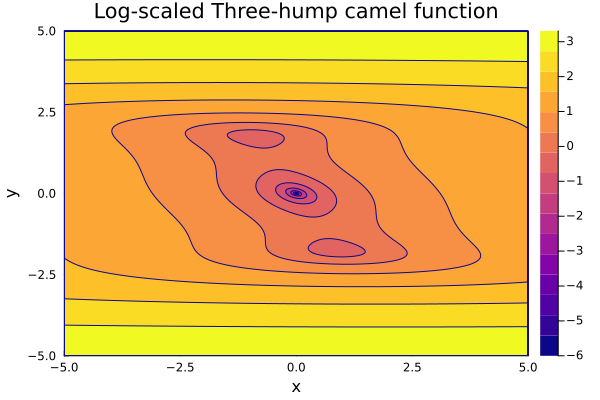

In [4]:
using LinearAlgebra
using Plots
using Random


# Wybraliśmy Three-hump camel function, posiada 3 minima lokalne, w tym 1 globalne pośrodku
function f(x, y)
    return 2 * x^2 - 1.05 * x^4 + x^6 / 6 + x*y + y^2
end

function f_grad(x, y)
    return [4 * x - 4.2 * x^3 + x^5 + y, x + 2 * y]
end

x = -5:0.01:5
y = -5:0.01:5
z = zeros(length(x), length(y))
for i in 1:length(x)
    for j in 1:length(y)
        z[i, j] = f(x[i], y[j])
    end
end
z_log = log10.(abs.(z) .+ 1e-6) 
contourf(x, y, z_log, fill=true, color=:plasma, xlabel="x", ylabel="y", title="Log-scaled Three-hump camel function")

In [5]:

function rand_uniform(a, b)
    return rand() * (b-a) + a
end

points = [[rand_uniform(-5, 5), rand_uniform(-5, 5)] for i in 1:10]
points

10-element Vector{Vector{Float64}}:
 [-0.8137613716416716, -2.9046505451257953]
 [-0.12466269241944516, 0.20077583565377743]
 [4.115601353581983, 3.230933454237954]
 [-0.1446374800523138, -3.1521922913784284]
 [-3.205513590408188, -1.1696981330195912]
 [-3.8846909041021327, -0.5443474296204407]
 [-0.5949435688156068, -1.0949633109730184]
 [3.6283799698705934, -4.6268671108207124]
 [-1.333715158205938, -2.7815096364323653]
 [-1.0540403114322405, 4.74248903388265]

### Funkcja implementująca algorytm metody największego spadku - szuka minimum globalnego funkcji 

In [ ]:
function steepest_gradient_descent(cost, grad, x0, α; max_iter=100, tol=1e-6)
    θ = copy(x0)
    f_values = zeros(max_iter)
    storage = zeros(length(θ))
    for i in 1:max_iter
        value_start = f(θ[1], θ[2])
        storage = f_grad(θ[1], θ[2])
        θ_new = θ - α .* storage
        value_stop = f(θ_new[1], θ_new[2])
        f_values[i] = value_start
        if value_stop - value_start > tol
            break
        else
            θ = θ_new
        end
    end
    return θ, f_values
end

Optimum: [2.8309905059015078e-8, -6.834615674296828e-8]
Minimum: [2.8309905059015078e-8, -6.834615674296828e-8]
Minimum: [-2.841629651779572e-9, 6.860300844567778e-9]
Minimum: [4.115601353581983, 3.230933454237954]
Minimum: [3.850701742548972e-8, -9.296416371515282e-8]
Minimum: [-3.205513590408188, -1.1696981330195912]
Minimum: [-3.8846909041021327, -0.5443474296204407]
Minimum: [8.981911408605139e-9, -2.1684252338688137e-8]
Minimum: [3.6283799698705934, -4.6268671108207124]
Minimum: [1.6897563674229507e-8, -4.079432739338769e-8]
Minimum: [-1.7475523460662232, 0.8737761753336235]


In [ ]:
opt, f_values = steepest_gradient_descent(f, f_grad, points[1], 0.1)
println("Optimum: ", opt)


for i in 1:10
    θ, f_values = steepest_gradient_descent(f, f_grad, points[i], 0.1)
    plot
    println("Minimum: ", θ)
end

Optimum: 2.8309905059015078e-8


ErrorException: Cannot convert Float64 to series data for plotting